In [2]:
import sys
sys.path.append('../src')

from preprocessing import annotation_preprocess
import pandas as pd
import scanpy as sc


Before filtering:  (10309, 20104)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


After filtering:  (10309, 19776)


/Users/apple/opt/miniconda3/envs/scFates/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/apple/Documents/GitHub/CNA_tool/tests/../src/preprocessing.py:54: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(data_processed,.1)
/Users/apple/Documents/GitHub/CNA_tool/tests/../src/preprocessing.py:57: FutureWarning: The specified parameters ('min_dist',) are no longer positional. Please specify them like `min_dist=0.25`
  sc.tl.umap(data_processed, 0.25, init_pos='paga')


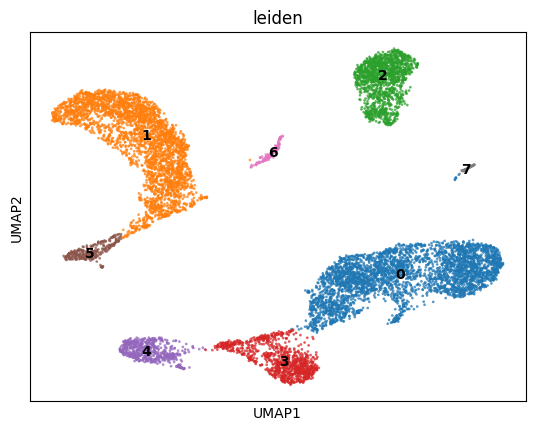

cell_type
CD4 T cell         3554
CD14 monocyte      3128
B cell             1450
CD8 T cell         1029
NK cell             608
FCGR3A monocyte     327
Dendritic           154
Megakaryocyte        59
Name: count, dtype: int64

In [5]:
adata = sc.read_h5ad("PBMC_simulated_cnas_041025.h5ad")
adata = annotation_preprocess(adata)
adata.obs['cell_type'].value_counts()